In [3]:
%matplotlib notebook
import numpy as np
from IPython.display import display, clear_output
from ipywidgets import interact, interact_manual, FloatSlider
import matplotlib.pyplot as plt
from PIL import Image
import time
import warnings
from time import sleep
warnings.filterwarnings('ignore')

In [4]:
lena_rgb = np.array(Image.open('resources/Lena.png'), dtype=np.uint8)
print (lena_rgb.shape)

(512, 512, 3)


## Histogram 

### calculate the gray, r, g, and b histograms for the lena_rgb image
For this exercise you're supposed to create four histograms. The first histogram is the grayscale histogram and the remaining are the color channels R, G, B. Use the weighted sum of the three linear-intensity values formular $Y' = 0.2126 \times R + 0.7152 \times G + 0.0722 \times B$ to grayscale the RGB image. 

The result should look like this:
![](resources/histogram_gt.png)


**Hint**: 
* Write a function to generate the histogram, you need it the next tasks.
* You just need a single numpy array with the shape `(4, 256)` to save the histogram bins for gray, r, g, and b.
* you can have multiple plots in matplotlib using plt.subplot()
* use `plt.bar` for your histogram with `plt.xlim([0,255])` to limit the x axis interval

#### Solution 1 (Loop histogram)

In [3]:
def hist_gray_loop(lena_rgb):
    # write your code here
    #pass
    
    im_gray = np.zeros(lena_rgb.shape[0:2], dtype = np.uint64)
    hist = np.zeros((4,256), dtype = np.uint64)
    for y in range(lena_rgb.shape[0]):
        for x in range(lena_rgb.shape[1]):
            r, g, b= int(lena_rgb[y,x,0]), int(lena_rgb[y,x,1]), int(lena_rgb[y,x,2])
            im_gray [y,x] = int (0.2126 * r + 0.7152 * g + 0.0722 * b)
            Y = im_gray.flatten()
            hist[0, Y] += 1
            hist[1, r] += 1
            hist[2, g] += 1
            hist[3, b] += 1
    return im_gray, hist

In [ ]:
im_gray_loop, hist_loop = hist_gray_loop(lena_rgb)

#### Visualization

In [ ]:
fig = plt.figure(figsize=(10,5))

plt.subplot(2, 2, 1)
plt.bar(range(0,256),hist_loop[0,:], color= '0.75')
plt.title('Gray')

plt.subplot(2, 2, 2)
plt.bar(range(0,256),hist_loop[1,:], color= 'r')
plt.title('Red')

plt.subplot(2, 2, 3)
plt.bar(range(0,256),hist_loop[2,:], color= 'g')
plt.title('Green')

plt.subplot(2, 2, 4)
plt.bar(range(0,256),hist_loop[3,:], color= 'b')
plt.title('Blue')

plt.show()

#### Solution 2 (Histogram with flat array)

In [5]:
def hist_flat(lena_rgb):
    # write your code here
    #pass
    r, g, b= lena_rgb[:,:,0].flatten(), lena_rgb[:,:,1].flatten(), lena_rgb[:,:,2].flatten()
    gray = (lena_rgb * [0.2126 , 0.7152, 0.0722]).sum(axis=-1)
    hist = np.zeros((4,256), dtype = np.uint64)
    
    for i, v in enumerate(gray.flatten()):
        hist[0, int(v)] += 1
        hist[1, r[i]] += 1
        hist[2, g[i]] += 1
        hist[3, b[i]] += 1
    return hist, gray

In [6]:
hist, gray_im = hist_flat(lena_rgb)

#### Visualization

<IPython.core.display.Javascript object>


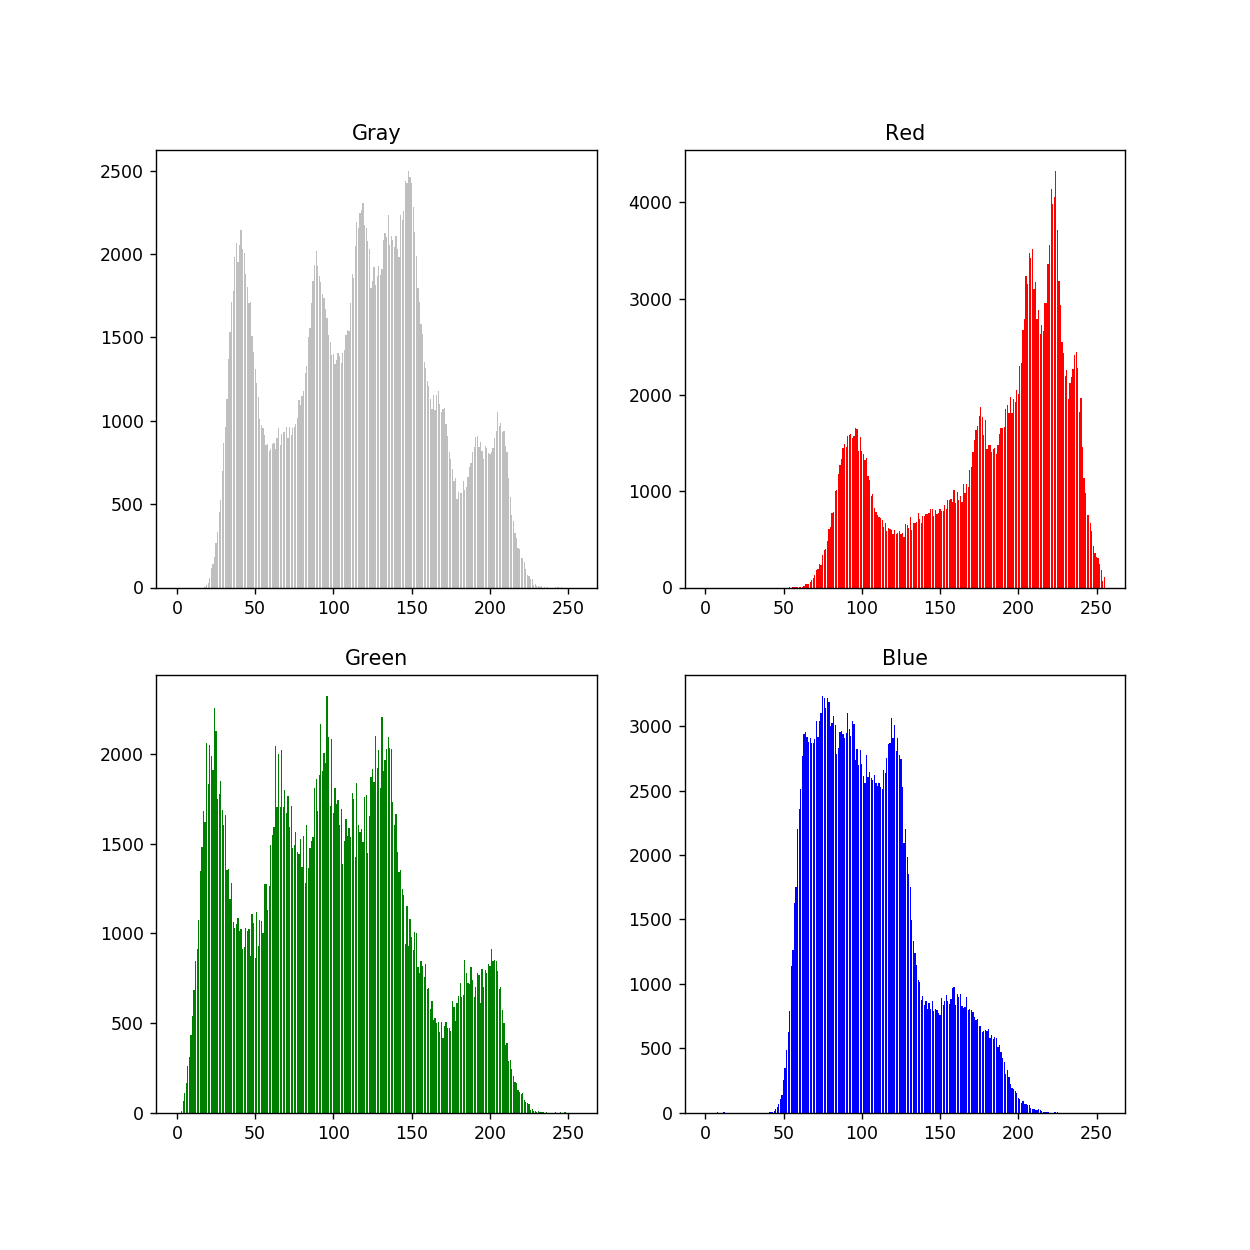

In [7]:
fig = plt.figure(figsize=(10,10))

plt.subplot(2, 2, 1)
plt.bar(range(0,256),hist[0,:], color= '0.75')
plt.title('Gray')

plt.subplot(2, 2, 2)
plt.bar(range(0,256),hist[1,:], color= 'r')
plt.title('Red')

plt.subplot(2, 2, 3)
plt.bar(range(0,256),hist[2,:], color= 'g')
plt.title('Green')

plt.subplot(2, 2, 4)
plt.bar(range(0,256),hist[3,:], color= 'b')
plt.title('Blue')

plt.show()

### Cumulative histogram

Write a function to calculate the cumulative histogram for the grayscaled version of Lena. 

#### Solution

In [8]:
def cum_hist_gray(lena_rgb):    
    # write your code here
    gray = (lena_rgb * [0.2126 , 0.7152, 0.0722]).sum(axis=-1)
    hist = np.zeros((1,256), dtype = np.uint64)
    cum_hist = np.zeros(hist.shape, dtype = np.uint64)
    
    for i, v in enumerate(gray.flatten()):
        hist[0, int(v)] += 1
    
    for j, w in enumerate(hist.flatten()):
        if j == 0:
            cum_hist [0,j] = hist [0,j]
        else:
            cum_hist [0,j] = cum_hist [0,j-1] + hist[0,j]
    return cum_hist, hist
        
cumulative_hist, histogram = cum_hist_gray(lena_rgb)

#### Visualization

<IPython.core.display.Javascript object>


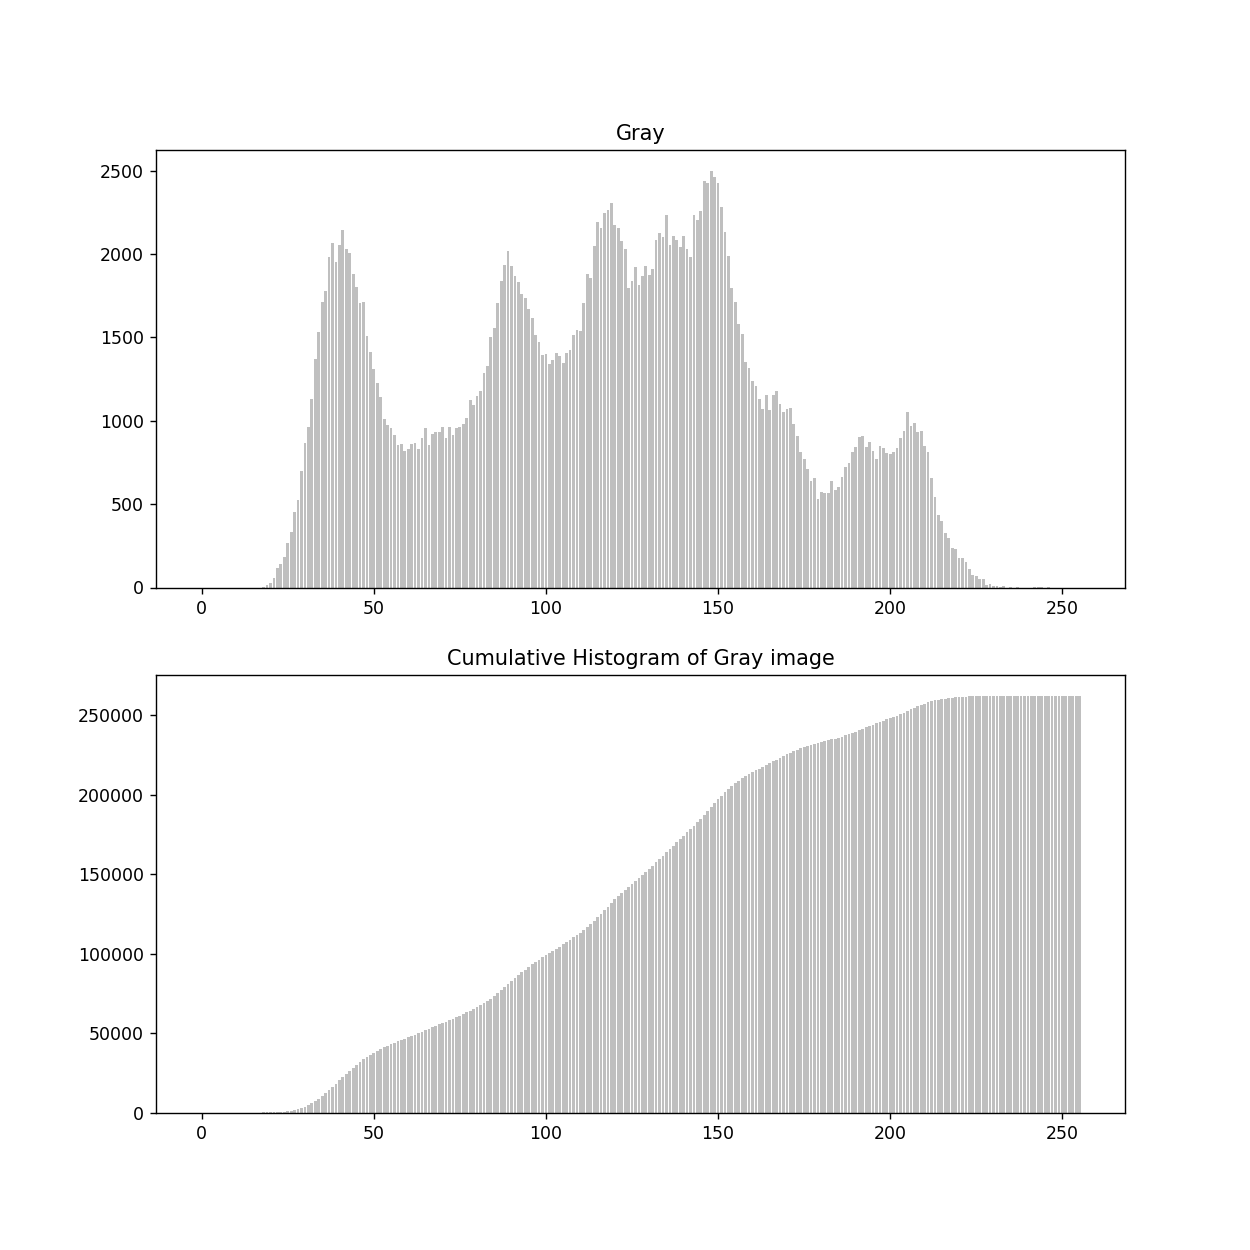

In [9]:
fig = plt.figure(figsize=(10,10))   

plt.subplot(2, 1, 1)
plt.bar(range(0,256),histogram[0,:], color= '0.75')
plt.title('Gray')

plt.subplot(2, 1, 2)
plt.bar(range(0,256), cumulative_hist[0,:], color= '0.75')
plt.title('Cumulative Histogram of Gray image')
plt.show()

### calculate the mean, variance and standard deviation
Use the previously created grayscale histogram to calculate the mean value, variance and standard deviation

#### Solution

In [10]:
print ('Mean = ', np.mean(gray_im))
print ('Variance = ', np.var(gray_im))
print ('Standard Deviation = ', np.std(gray_im))

Mean =  116.76759995269775
Variance =  2442.0330383153
Standard Deviation =  49.41693068489078


## Point Operations

### Manual Contrast Adjustment

For the following exercise you have to implement a manual contrast adjustment based on this formular: $f(m,n) = a[I(m,n) - s] + s $ where $a \in \mathbb{R}, s \in [0, 255]$.
Additional you implement the same approach with a Lookup-Table (LUT). Can you see the benefits of a LUT? At least you can visualize the values of the LUT using `plt.plot` and the histogram.

**Visualization proposal**:
![](resources/manual_contrast_adjustment.png)

**Hint**
* You don't need to loop over the x and y coordinates of your image because only the luminance values are important not the coordinates. Check the function `numpy.flatten`
* You can measure the execution time in Python like this:
```python
    start = time.time()    
    # code block start
    
    # code block end
    diff = time.time() - start # execution time in seconds
    print("Loop execution time: {:.3f} ms".format(diff * 1000))
```

In [11]:
lena_low_contrast = np.array(Image.open('resources/lena-low-contrast.png'), dtype=np.float32)

#### Solution

In [12]:
def saturation(a, s):
    # write your code here
    contr_adj = (np.zeros(lena_low_contrast.shape, dtype = np.float32)).flatten()
                                                  
    for i, v in enumerate(lena_low_contrast.flatten()):
        contr_adj [i] = max (0, min((a*(v-s)+s), 255))
    
    print ("a: {}  s: {}".format(a, s))
    
    return contr_adj

In [24]:
@interact(
    a=FloatSlider(min=-1.0, max=10.0, value=1.0, step=0.05, continuous_update=False),
    s=FloatSlider(min=0.0, max=255.0, value=127.0, step=0.05, continuous_update=False)
)
def run(a, s):
    adj_im_flat = saturation(a, s)
    adj_im = np.reshape(adj_im_flat, (lena_low_contrast.shape))
    fig = plt.figure()
    plt.imshow(adj_im, cmap='gray', vmin=0, vmax=255)
    

interactive(children=(FloatSlider(value=1.0, continuous_update=False, description='a', max=10.0, min=-1.0, ste…

### Auto Contrast Adjustment

Manual adjustments are nice and give you the opportunity to adjust an image as you want. But if time is rare and you have a lot of images with low contrast, automation is the key. 
In this task you implement your own auto contrast operation on a low contrast version of lena (already grayscaled) and after this you calculate the histogram. For your auto contrast implementation use the formula below:

$f_{ac}(i) = (i - i_{low}) \frac{i_{max} - i_{min}}{i_{high} - i_{low}}$

**Visualization proposal:**
![](resources/auto_contrast_adjustment.png)


**Hint:** 
- you need your histogram (again)
- $i_{low}$ is the first non zero bin of the histogram while $i_{high}$ the last bin is
- $i_{max}$ is the maximum intensity for a pixel and $i_{low}$ the opposite

#### Solution

<IPython.core.display.Javascript object>


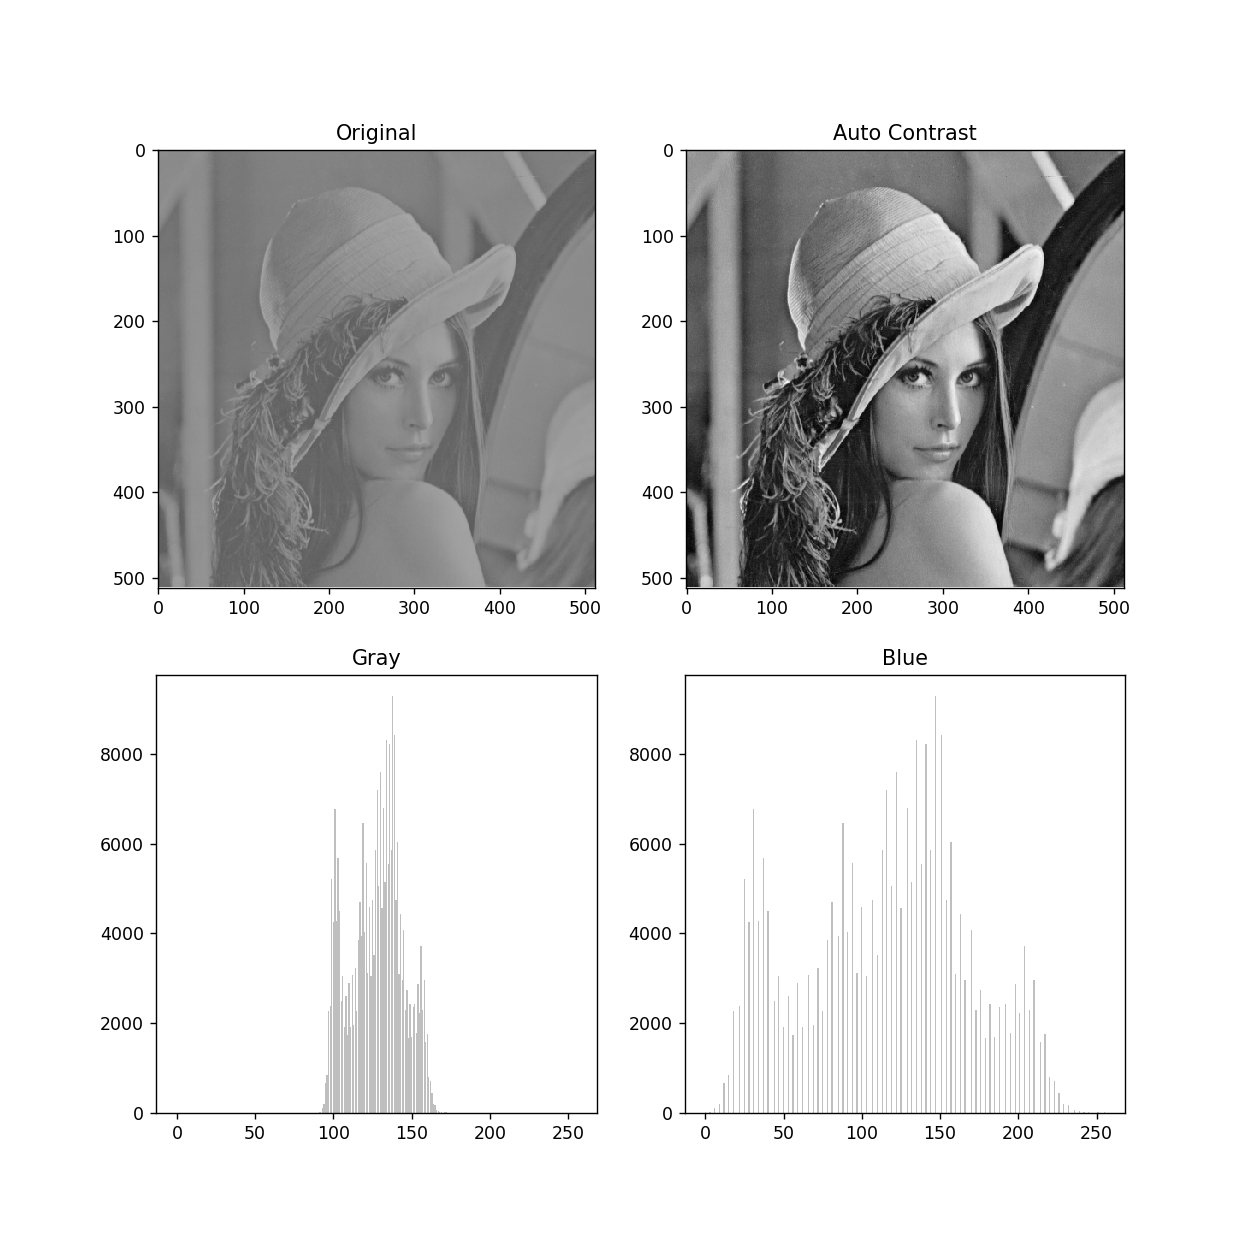

In [37]:
def autocontrast(low_contrast):    
    # write your code here
    hist = np.zeros(256, dtype = np.uint64)
    hist_auto = np.zeros(256, dtype = np.uint64)
    non_zero = []
    
    for i, v in enumerate(low_contrast.flatten()):
        hist [int(v)] += 1
    
    for i, v in enumerate(hist):
        if v != 0: 
            non_zero.append(i)
     
    i_low = non_zero[0]
    i_hi = non_zero[-1]
    
    auto_contr = (low_contrast - i_low) * 255.0 / (i_hi - i_low) 
    
    for i, v in enumerate(auto_contr.flatten()):
        hist_auto [int(v)] += 1    
    
    fig = plt.figure(figsize=(10,10))
    
    plt.subplot(2, 2, 1)
    plt.imshow(low_contrast, cmap='gray', vmin=0, vmax=255)
    plt.title('Original')

    plt.subplot(2, 2, 2)
    plt.imshow(auto_contr, cmap='gray', vmin=0, vmax=255)
    plt.title('Auto Contrast')

    plt.subplot(2, 2, 3)
    plt.bar(range(0,256),hist, color= '.75')
    plt.title('Gray')

    plt.subplot(2, 2, 4)
    plt.bar(range(0,256),hist_auto, color= '.75')
    plt.title('Blue')
        
    plt.show()
    
autocontrast(lena_low_contrast)

### Color Space Conversion - (optional)
A color space conversion is also a point operation. In this task you can try to implement the conversion from RGB -> HSL -> RGB. Compared to RGB where each plane represents a color and the final color the result of an addition of the R G B components is, HSL contains a hue, saturation and luminance component. The RGB color space can depicted as a cube where each component represents a axis while HSV can be represented as a cylinder. H is the angle for the color [0, 360°) on this cylinder, S is the saturation of the color [0, 1] and V the lightness [0, 1]

https://en.wikipedia.org/wiki/HSL_and_HSV

- RGB to HSV: https://en.wikipedia.org/wiki/HSL_and_HSV#From_RGB
- HSV to RGB: https://en.wikipedia.org/wiki/HSL_and_HSV#HSV_to_RGB


I highly recommend the Software "Fiji -  [Download](https://fiji.sc/)" and the *Color Inspector 3D* plugin (already included) to visualize the color spaces

In [ ]:
def convert(h, s, v):
    # write your code here
    print(h, s, v)

In [ ]:
@interact(h=FloatSlider(min=0, max=360, step=10, continuous_update=False),
          s=FloatSlider(min=-1, max=1, step=0.1, continuous_update=False), 
          v=FloatSlider(min=-1, max=1, step=0.1, continuous_update=False)
         )
def change_color(h=0, s=0, v=0):    
    convert(h, s, v)
    